In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
PR_HS_LEN_performance = pd.read_csv('data/performance_PR_HS_LEN2.csv.gz')
PR_HS_LEN_performance = PR_HS_LEN_performance[PR_HS_LEN_performance.tot_comments<200]
PR_HS_LEN_performance = PR_HS_LEN_performance.sort_values('tot_comments')
PR_HS_LEN_performance.shape

(380, 5)

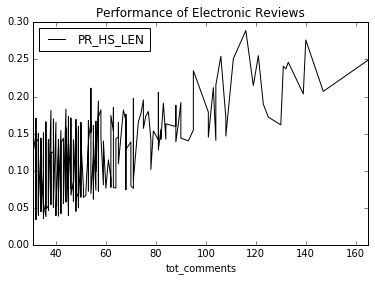

In [15]:
ax = PR_HS_LEN_performance.plot('tot_comments','elapsed_mhr' ,label="PR_HS_LEN",color='k', title="Performance of Electronic Reviews")


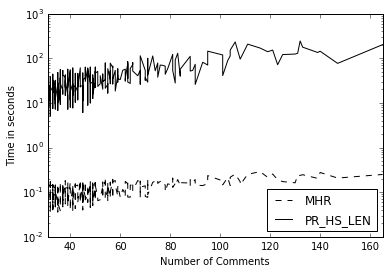

In [16]:
fig, ax = plt.subplots()
labels = []

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='elapsed_mhr', c="k", ls="--")
labels.append("MHR")

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='elapsed_phl', c="k", ls="-")
labels.append("PR_HS_LEN")

lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlabel("Number of Comments")
ax.set_ylabel("Time in seconds")
ax.set_yscale('log')
plt.show()